In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from itertools import chain
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
url = "https://raw.githubusercontent.com/shivvignesh/IMDb-reviews-Sentiment-Analysis/master/dataset.csv"
data = pd.read_csv(url,encoding = "ISO-8859-1",nrows=3000)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentimentText  3000 non-null   object
 1   Sentiment      3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:

data.SentimentText.str.lower().str.strip()

0       first think another disney movie, might good, ...
1       put aside dr. house repeat missed, desperate h...
2       big fan stephen king's work, film made even gr...
3       watched horrid thing tv. needless say one movi...
4       truly enjoyed film. acting terrific plot. jeff...
                              ...                        
2995    film offers absolutely imagination it's premis...
2996    movie even big step form typical fare dished b...
2997    fine effort australian show. probably surprisi...
2998    movie got interesting start. road however, sto...
2999    past months collected voyager seasons 4 7 dvd ...
Name: SentimentText, Length: 3000, dtype: object

In [ ]:
data.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [ ]:
translator = str.maketrans('', '', string.punctuation)

data["SentimentText_clean"] = data.SentimentText.map(lambda x: x.strip().lower().translate(translator))
data["SentimentText_clean"].head()


0    first think another disney movie might good it...
1    put aside dr house repeat missed desperate hou...
2    big fan stephen kings work film made even grea...
3    watched horrid thing tv needless say one movie...
4    truly enjoyed film acting terrific plot jeff c...
Name: SentimentText_clean, dtype: object

In [ ]:
corpus = ' '.join(data["SentimentText_clean"])
all_words = word_tokenize(corpus)
stopwords = nltk.corpus.stopwords.words('english')
all_words = [word for word in all_words if word not in stopwords]


In [ ]:
# otra manera de hacerlo
corpus = data["SentimentText_clean"].map(word_tokenize)
stopwords = nltk.corpus.stopwords.words('english')
all_words = list(chain(*corpus))
all_words = [word for word in all_words if word not in stopwords]

In [ ]:
from collections import Counter
Counter(["a","a","b"])

Counter({'a': 2, 'b': 1})

<Axes: >

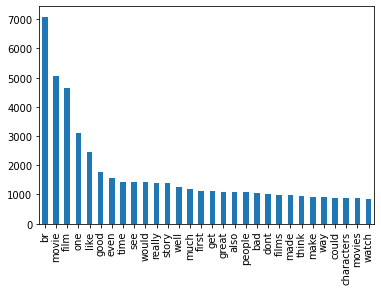

In [ ]:

pd.Series(Counter(all_words)).sort_values(ascending=False).iloc[:30].plot(kind="bar")

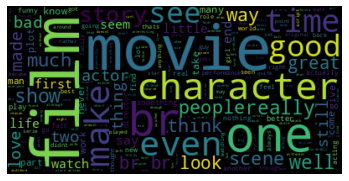

In [ ]:

# Create and generate a word cloud image:
text_join = ' '.join(all_words)
wordcloud = WordCloud().generate(text_join)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
corpus = data.SentimentText_clean.to_numpy()
cv = CountVectorizer()
cv_matrix = cv.fit_transform(corpus)

feature_names = cv.get_feature_names_out()
dense = cv_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,001,007,01,010,029,048,053105,087,09082009,091505,...,âcause,âdr,âfriends,âjean,âlubitsch,âmad,âorder,âretired,âthe,â½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corpus = data.SentimentText_clean.to_numpy()
cv = CountVectorizer(stop_words='english',
                     strip_accents="ascii",
                     max_df=0.95,
                     min_df=0.05)
cv_matrix = cv.fit_transform(corpus)
feature_names = cv.get_feature_names_out()
dense = cv_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,10,able,absolutely,acting,action,actor,actors,actually,american,audience,...,world,worst,worth,written,wrong,year,years,yes,young,youre
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,1,2,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#tf-idf

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05,
                            stop_words='english',
                             strip_accents="ascii",)
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


In [ ]:
df.head()

,10,able,absolutely,acting,action,actor,actors,actually,american,audience,...,world,worst,worth,written,wrong,year,years,yes,young,youre
0,0.202432,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.160694,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.160172,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.204492,0.0,0.000000,0.0,0.0,0.0
2,0.208099,0.0,0.115602,0.156154,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.101989,0.0,0.0,0.109259,0.0,0.082596,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.203854,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.242345,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [ ]:
corpus = data.SentimentText_clean.to_numpy()
cv = CountVectorizer(stop_words='english',
                     strip_accents="ascii",
                     min_df=0.01,
                     ngram_range=(1,2))
cv_matrix = cv.fit_transform(corpus)
feature_names = cv.get_feature_names_out()
dense = cv_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,10,100,12,15,20,30,60s,70s,80s,90,...,york,youd,youll,young,younger,youre,youth,youve,zombie,zombies
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:

wordnet_lemmatizer = WordNetLemmatizer()
all_words_lem = list(map(lambda word: wordnet_lemmatizer.lemmatize(word, pos="v"), all_words))

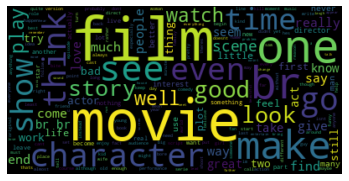

In [ ]:

# Create and generate a word cloud image:
text_join = ' '.join(all_words_lem)
wordcloud = WordCloud().generate(text_join)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: >

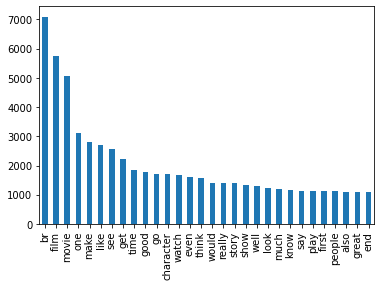

In [ ]:
pd.Series(Counter(all_words_lem)).sort_values(ascending=False).iloc[:30].plot(kind="bar")